In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
measurements = np.loadtxt("logs/test_1_measured_coordinates")
real_coordinates = np.loadtxt("logs/test_1_real_coordinates")

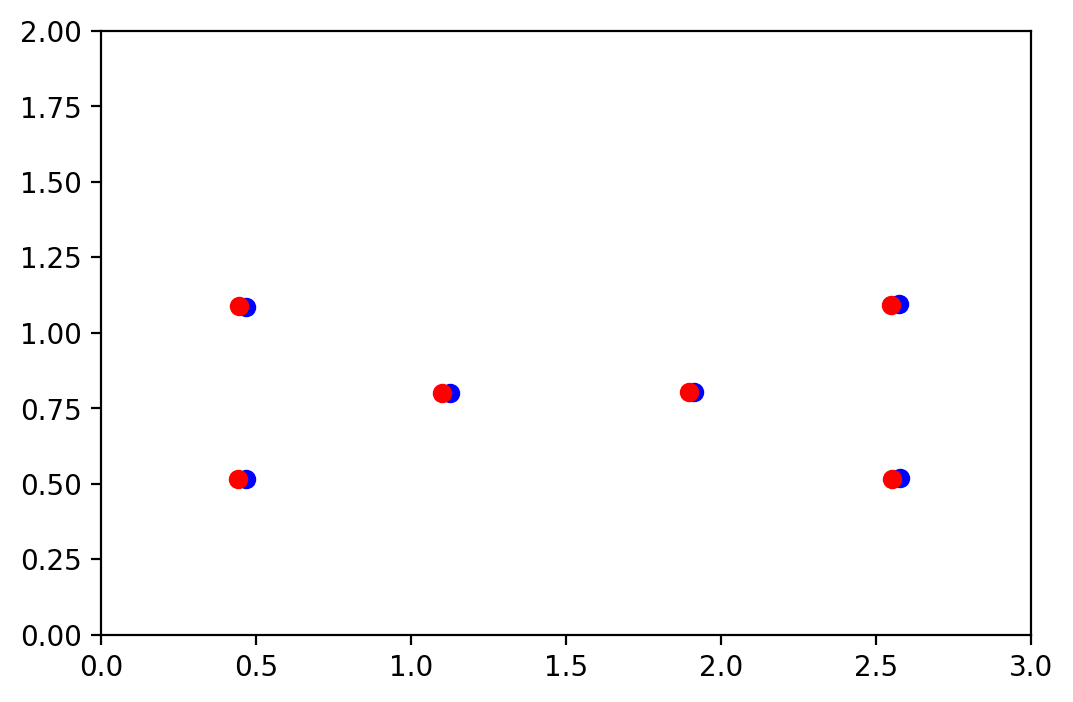

In [144]:
plt.figure(dpi=200)
plt.xlim((0, 3))
plt.ylim((0, 2))
plt.scatter(measurements[:, 0], measurements[:, 1], color='blue')
plt.scatter(real_coordinates[:, 0], real_coordinates[:, 1], color='red')

In [145]:
mean_real_coordinates = np.mean(real_coordinates, axis=0)
mean_measurements = np.mean(measurements, axis=0)

translation = mean_measurements - mean_real_coordinates

print(mean_measurements)
adjusted_measurements = measurements - translation
adjusted_real = real_coordinates

[1.52003867 0.80315447 0.0243445 ]


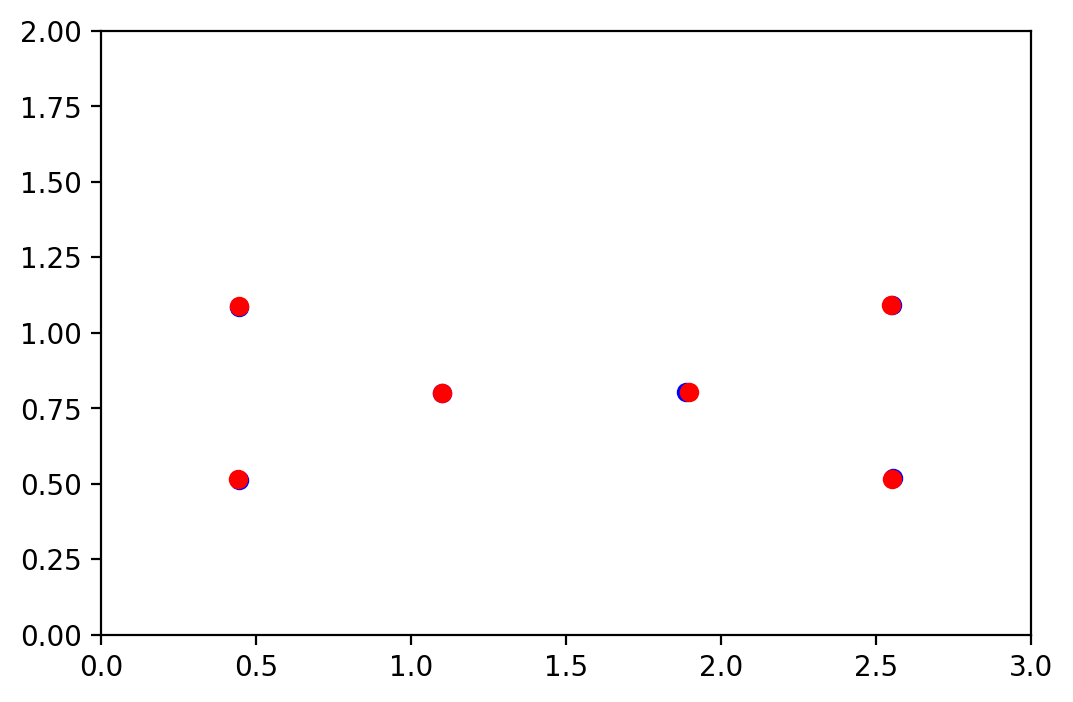

In [146]:
plt.figure(dpi=200)
plt.xlim((0, 3))
plt.ylim((0, 2))
plt.scatter(adjusted_measurements[:, 0], adjusted_measurements[:, 1], color='blue')
plt.scatter(adjusted_real[:, 0], adjusted_real[:, 1], color='red')

In [147]:
translation_mean = adjusted_measurements - adjusted_real
errors = np.mean(abs(translation_mean), axis=0)
print("Errors without rotating")
print(errors)


Errors without rotating
[0.00321259 0.00216602 0.00259078]


In [148]:
print("Final error without rotation")
print(np.mean(errors[:2]))

Final error without rotation
0.002689306421412324


In [149]:
cross_covariance = adjusted_real.T @ adjusted_measurements
v, d, u = np.linalg.svd(cross_covariance)
rotation = v @ u.T

In [150]:
rotated_measurements = (rotation @ adjusted_measurements.T).T

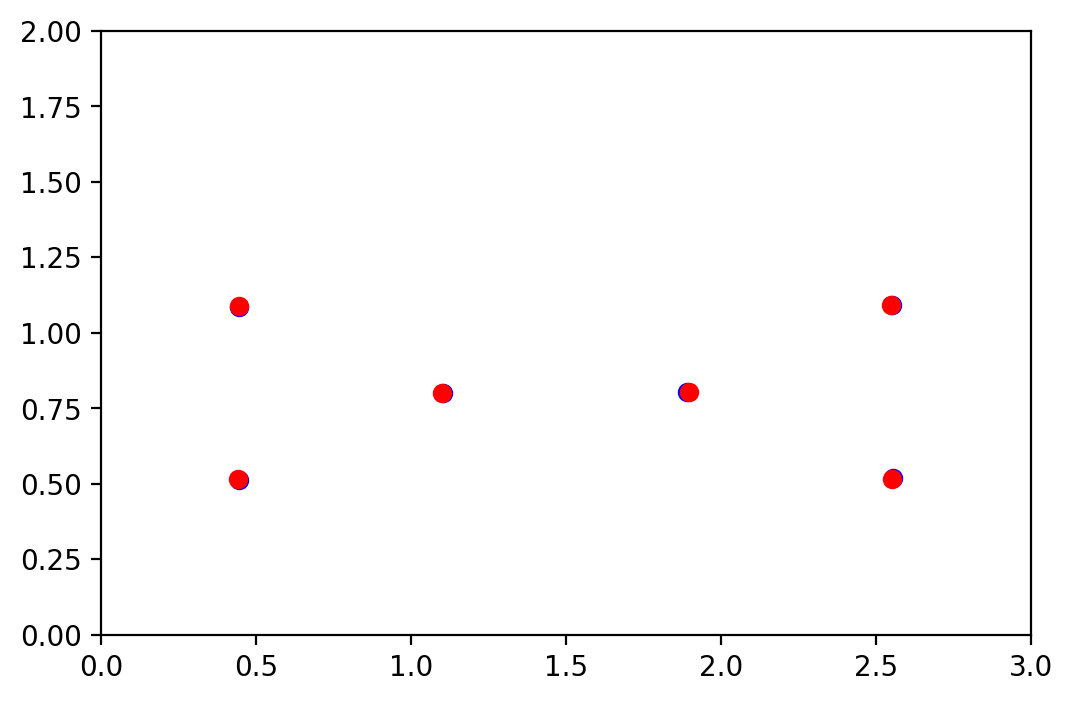

In [151]:
plt.figure(dpi=200)
plt.xlim((0, 3))
plt.ylim((0, 2))
plt.scatter(rotated_measurements[:, 0], rotated_measurements[:, 1], color='blue')
plt.scatter(adjusted_real[:, 0], adjusted_real[:, 1], color='red')

In [152]:
translation_mean_final = rotated_measurements - adjusted_real
errors_final = np.mean(abs(translation_mean_final), axis=0)
print("Errors with rotation")
print(errors_final)

Errors with rotation
[0.00333802 0.00165218 0.00310043]


In [153]:
final_main_error = np.mean(translation_mean_final[:1])
print("Final error")
print(final_main_error)

Final error
0.0016638403538545546
